<a href="https://colab.research.google.com/github/ravilon/ufpel-pdi/blob/main/LAB8_Compressao_JPEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB8 — Explorando Compressão JPEG

Disciplina: **Processamento Digital de Imagens (PDI)** – UFPel  
Professor: **Guilherme Corrêa**  

Vamos utilizar uma imagem PNG como exemplo (pode ser `lena.png` ou `tuyuka.png`) para os exercícios.

---

## Objetivos  

1. Carregar uma imagem PNG sem perdas

2. Comprimir a imagem em JPEG com diferentes níveis de quantização

3. Comparar taxa de compressão e qualidade (PSNR) em relação à imagem original
---


## Bibliotecas úteis
Se estiver no Colab, rode a célula de instalação uma única vez.

In [2]:
# Se estiver no Colab, descomente a linha abaixo para garantir o OpenCV instalado
# !pip install opencv-python

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files

## Upload de uma imagem

Vamos usar `files` do `google.colab` para fazer upload de uma imagem colorida e a biblioteca OpenCV (`cv2`) para abri-la.

Sugestão: utilizar a imagem `tuyuka.png`, que está disponível no repositório para os exercícios. A imagem está no formato RGB.

Saving images.png to images (1).png
Arquivo enviado: images (1).png
Formato da imagem: (205, 246, 3)


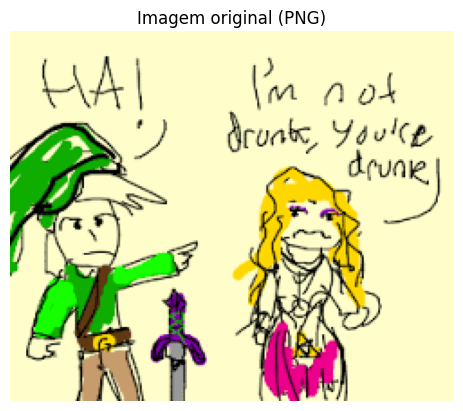

In [3]:
# Faça upload de uma imagem PNG
uploaded = files.upload()

# Pega o nome do primeiro arquivo enviado
img_name = list(uploaded.keys())[0]
print("Arquivo enviado:", img_name)

# Lê a imagem com OpenCV (por padrão BGR)
img_bgr = cv2.imread(img_name, cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

print("Formato da imagem:", img_rgb.shape)

# Mostra a imagem original
plt.imshow(img_rgb)
plt.title("Imagem original (PNG)")
plt.axis("off")
plt.show()

# Funções para Comprimir e Calcular PSNR

As duas funções definidas abaixo têm as seguintes tarefas:

**compute_psnr(img1, img2):**
    Calcula PSNR entre duas imagens RGB em float ou uint8.

**compress_and_evaluate(img_rgb, quality, base_name):**
    Salva img_rgb como JPEG com determinada qualidade,
    lê de volta e retorna imagem reconstruída, PSNR e taxa de compressão.


In [5]:
def compute_psnr(img1, img2):
    # Calcula PSNR entre duas imagens RGB em float ou uint8.
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float("inf")
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr


def compress_and_evaluate(img_rgb, quality, base_name):
    # Salva img_rgb como JPEG com determinada qualidade,
    # lê de volta e retorna imagem reconstruída, PSNR e taxa de compressão.

    # Nome do arquivo JPEG temporário
    jpeg_name = f"{base_name}_q{quality}.jpg"

    # Converter de RGB para BGR, pois o OpenCV salva em BGR
    img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

    # Salvar em JPEG com qualidade escolhida
    cv2.imwrite(jpeg_name, img_bgr, [cv2.IMWRITE_JPEG_QUALITY, quality])

    # Ler o JPEG de volta
    jpeg_bgr = cv2.imread(jpeg_name, cv2.IMREAD_COLOR)
    jpeg_rgb = cv2.cvtColor(jpeg_bgr, cv2.COLOR_BGR2RGB)

    # PSNR em relação à imagem original
    psnr = compute_psnr(img_rgb, jpeg_rgb)

    # Tamanho dos arquivos em bytes
    original_size = os.path.getsize(img_name)
    jpeg_size = os.path.getsize(jpeg_name)

    # Taxa de compressão (quanto o arquivo diminuiu)
    # Por exemplo, 4.0 significa que o PNG ocupa 4 vezes mais espaço que o JPEG
    compression_ratio = original_size / jpeg_size

    return jpeg_rgb, psnr, compression_ratio, jpeg_name, jpeg_size


# 🖼️ Tarefa: Uso das funções Comprimir e Calcular PSNR

- Com a função `compress_and_evaluate()`, comprima a imagem variando a qualidade. Teste com q=1, q=10, q=30, q=50, q=90, etc.
- Para cada versão, mostre o resultado em termos de PSNR (dB), taxa de compressão e tamanho final da imagem JPEG em bytes.
- Apresente todas as versões de imagens geradas e compare-as visualmente.
- Bônus: faça um gráfico mostrando a os valores de PSNR (dB) à medida que varia o valor de qualidade (q).


Qualidade: 1, PSNR: 17.55 dB, Taxa de Compressão: 5.53, Tamanho JPEG: 2808 bytes


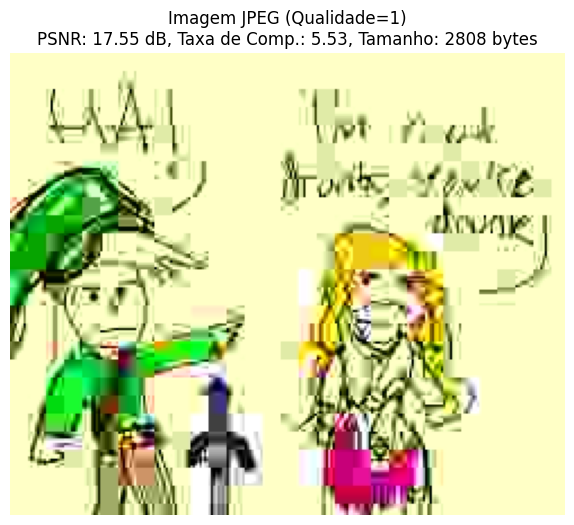

Qualidade: 10, PSNR: 20.50 dB, Taxa de Compressão: 3.37, Tamanho JPEG: 4606 bytes


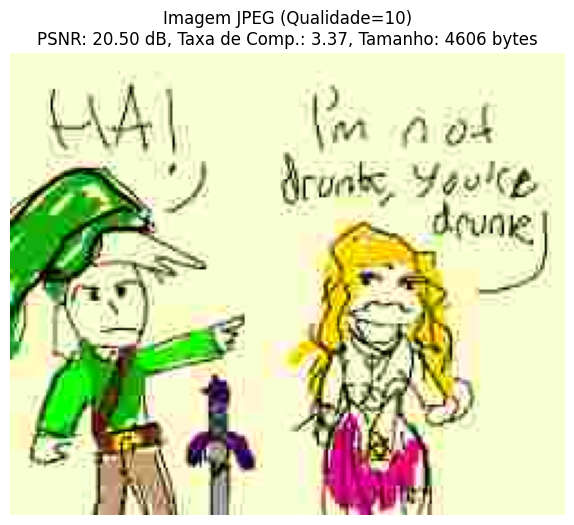

Qualidade: 30, PSNR: 23.65 dB, Taxa de Compressão: 1.94, Tamanho JPEG: 8019 bytes


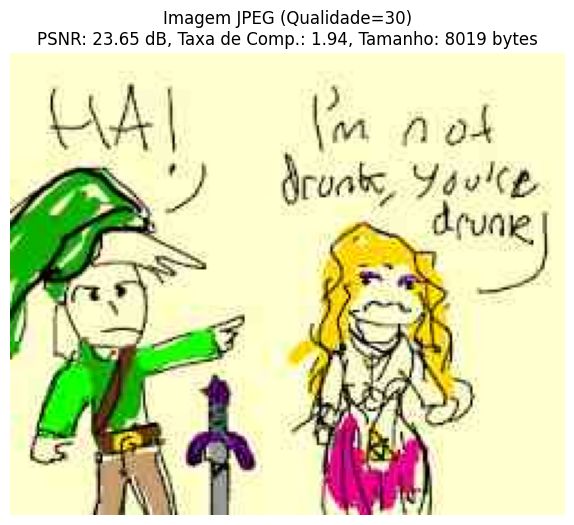

Qualidade: 50, PSNR: 25.30 dB, Taxa de Compressão: 1.51, Tamanho JPEG: 10316 bytes


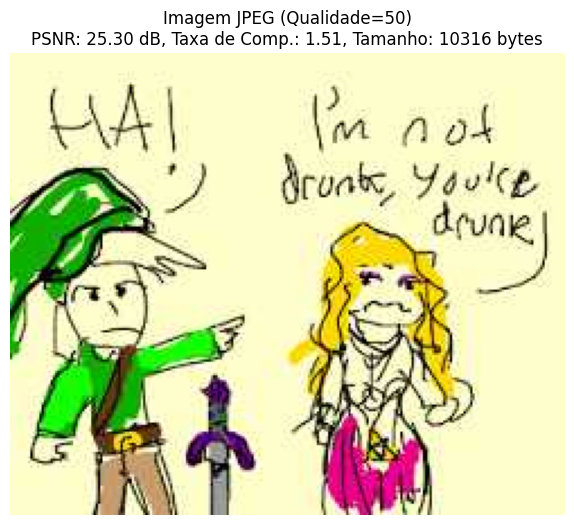

Qualidade: 90, PSNR: 29.64 dB, Taxa de Compressão: 0.71, Tamanho JPEG: 21752 bytes


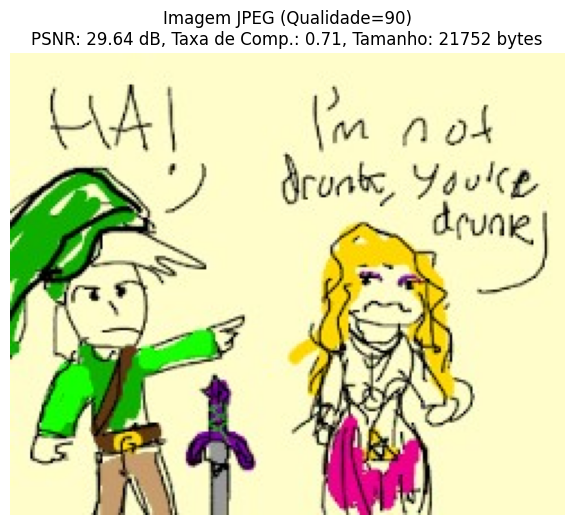

Qualidade: 100, PSNR: 30.56 dB, Taxa de Compressão: 0.32, Tamanho JPEG: 48747 bytes


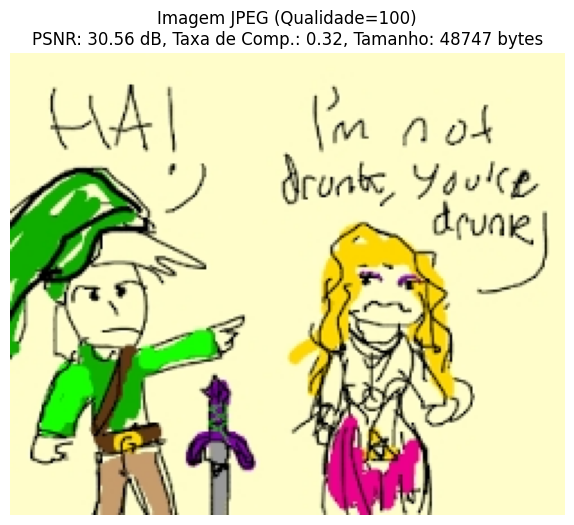

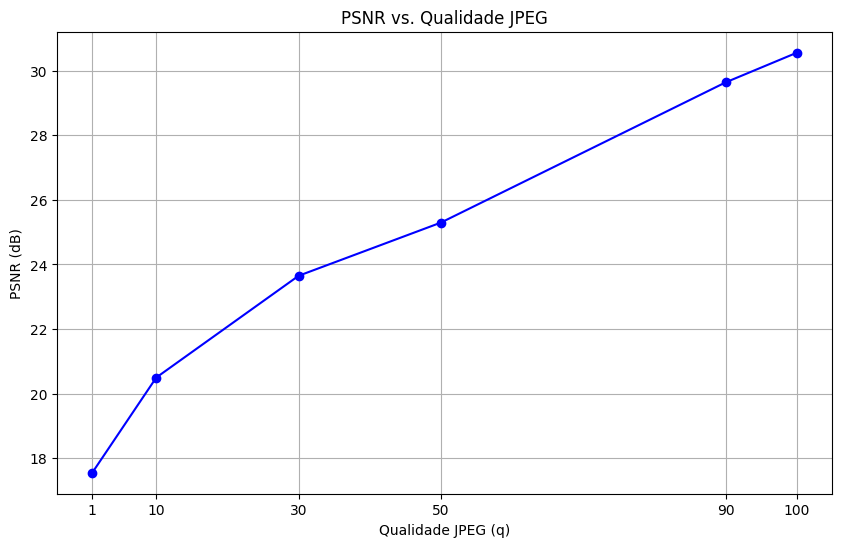

In [13]:
qualities = []
psnr_values = []

# Qualidades a serem testadas
quality_levels = [1, 10, 30, 50, 90, 100]

for q in quality_levels:
    jpeg_rgb, psnr, compression_ratio, jpeg_name, jpeg_size = compress_and_evaluate(img_rgb, q, "tuyuka")
    qualities.append(q)
    psnr_values.append(psnr)

    print(f"Qualidade: {q}, PSNR: {psnr:.2f} dB, Taxa de Compressão: {compression_ratio:.2f}, Tamanho JPEG: {jpeg_size} bytes")

    # Mostrar a imagem JPEG comprimida
    plt.figure(figsize=(8, 6))
    plt.imshow(jpeg_rgb)
    plt.title(f"Imagem JPEG (Qualidade={q})\nPSNR: {psnr:.2f} dB, Taxa de Comp.: {compression_ratio:.2f}, Tamanho: {jpeg_size} bytes")
    plt.axis("off")
    plt.show()

# Gerar o gráfico de PSNR vs Qualidade
plt.figure(figsize=(10, 6))
plt.plot(qualities, psnr_values, marker='o', linestyle='-', color='blue')
plt.title('PSNR vs. Qualidade JPEG')
plt.xlabel('Qualidade JPEG (q)')
plt.ylabel('PSNR (dB)')
plt.grid(True)
plt.xticks(quality_levels)
plt.show()